# DBSCAN

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

## Generate sample data

In [13]:
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4, random_state=0)
X.shape

(750, 2)

### Scale data

In [14]:
X = StandardScaler().fit_transform(X)

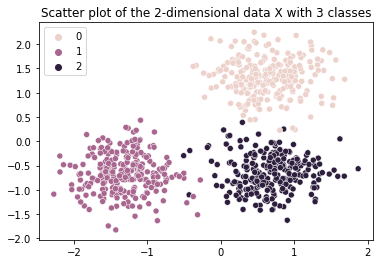

In [41]:
sns.scatterplot(x=X[:,0], y=X[:,1], hue=labels_true)
plt.title("Scatter plot of the 2-dimensional data X with 3 classes");

## Compute DBSCAN

In [33]:
dbscan = DBSCAN(eps=0.3, min_samples=10).fit(X)

In [21]:
# Create a array of False in the shape of n_samples
core_samples_mask = np.zeros_like(dbscan.labels_, dtype=bool) 
# Add True whenever a datapoint is a core sample
core_samples_mask[dbscan.core_sample_indices_] = True 
print(core_samples_mask[:50])

[ True  True  True  True  True False  True  True  True  True  True  True
  True  True False  True False  True False  True  True  True  True  True
  True  True  True  True  True  True  True  True False  True  True  True
  True  True  True False  True  True  True  True False  True  True  True
  True  True]


In [25]:
# Cluster labels for each point in the dataset given to fit()
# Noisy samples are given the label -1
labels = dbscan.labels_
print(labels[:50])

[ 0  1  0  2  0  1  1  2  0  0  1  1  1  2  1  0 -1  1  1  2  2  2  2  2
  1  1  2  0  0  2  0  1  1  0  1  0  2  0  0  2  2  1  1  1  1  1  0  2
  0  1]


In [31]:
# Number of clusters in labels, ignoring noise (-1) if present in labels.
n_clusters_ = len(np.unique(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

In [32]:
print("Estimated number of clusters:", n_clusters_)
print("Estimated number of noise points:", n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f" % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f" % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, labels))


Estimated number of clusters: 3
Estimated number of noise points: 18
Homogeneity: 0.953
Completeness: 0.883
V-measure: 0.917
Adjusted Rand Index: 0.952
Adjusted Mutual Information: 0.916
Silhouette Coefficient: 0.626


## Plot result

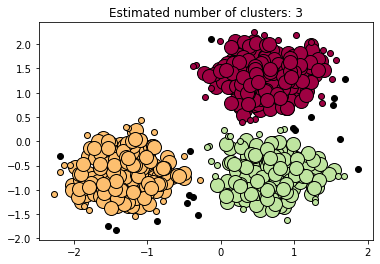

In [42]:
# Black removed and is used for noise instead.
unique_labels = set(labels) # Creates set which is an unordered collection with no duplicates
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))] # Create colors for all four
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()